In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats.mstats import normaltest

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from cs109.dataloader import build_dataset

%matplotlib inline

#  Data Collection

All the data has been collected from open and free sources.

### Microsoft Stock 

We obtained Microsoft adjusted closing price values from Yahoo Finance for every trading day since 1995. In our dataset, it is represented by the variable 'Adj Close.' 

### S&P500

We obtained S&P500 closing price values from http://www.cboe.com/micro/buywrite/dailypricehistory.xls for every trading day since 1986 (data from Yahoo Finance was only available from 2005). In our dataset, it is represented by the variable 'SP500.'

###  10-Year Treasury Constant Maturity Rate

The data was obtained from https://fred.stlouisfed.org/series/DGS10 for every trading day since 1989. In our dataset, it is represented by the variable 'DGS10.'

###  Federal Funds Rate

The data was obtained from https://fred.stlouisfed.org/series/FEDFUNDS for every calendar month since 1954. We adjust the data frequency to trading day by padding it forward. In our dataset, it is represented by the variable 'FEDFUNDS.'

### Microsoft Earnings

The data was obtained from https://www.microsoft.com/en-us/Investor/earnings/trended/quarterly-income-statements.aspx in for every quarter from Q3 1995. In our dataset, it is represented by the variables ‘Revenue,’ ‘Gross Margin,’ ‘Operating Income,’ and ‘Diluted EPS.’ We adjust the data frequency to trading day by padding it forward.

### Acquisition History

The data was obtained from https://www.microsoft.com/en-us/Investor/acquisition-history.aspx and consists of the press release date and the company name. It was manually copied and converted into CSV format. In our dataset, it is represented by the variable 'Acquisition,' which takes a value of one if a press release happened on each given date and zero otherwise.

### Investment History

The data was obtained from https://www.microsoft.com/en-us/Investor/investment-history.aspx and consists of the press release date and the company name. It was manually copied and converted into CSV format. In our dataset it is represented by the variable 'Investment', which takes a value of one if a press release happened on each given date and zero otherwise.

### SEC Filings

The SEC filings data was obtained from https://www.microsoft.com/en-us/Investor/sec-filings.aspx. It was manually copied and converted into CSV format. It was available from 1994 and consists of the filing date and the document type. In our dataset, it is represented by a set of dummy variables. The variable name is the document type and the value is one if the document type was filed on the date, zero otherwise.

### Data Refresh

Only the adjusted closed price is automatically refreshed and includes the newest data. All other sources have to be manually updated by downloading relevant files from the sources.

### Load the Dataset 

In [2]:
msft_data = build_dataset()

In [3]:
msft_data.head(n = 10)

,Adj Close,Diluted EPS,Gross Margin,Operating Income,Revenue,SP500,DFF,DGS10,NASDAQ100,Acquisition,...,SC 13D,SC 13D/A,SC 13G,SC 13G/A,SC TO-C,SC TO-I,SC TO-I/A,SC TO-T,SC TO-T/A,SD
1995-03-31,3.018377,0.04,1272.0,544.0,1627.0,500.71,6.30,7.20,447.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-03,2.970635,0.04,1272.0,544.0,1627.0,501.85,6.28,7.14,448.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-04,2.965330,0.04,1272.0,544.0,1627.0,505.24,6.08,7.12,441.86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-05,2.997158,0.04,1272.0,544.0,1627.0,505.57,5.98,7.12,444.66,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-06,2.970635,0.04,1272.0,544.0,1627.0,506.08,5.95,7.09,439.92,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-07,2.954721,0.04,1272.0,544.0,1627.0,506.42,5.94,7.11,444.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-10,3.010420,0.04,1272.0,544.0,1627.0,507.01,6.00,7.12,449.36,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-11,3.060815,0.04,1272.0,544.0,1627.0,505.53,5.91,7.09,453.33,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-12,3.039596,0.04,1272.0,544.0,1627.0,507.17,6.17,7.06,456.98,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-04-13,3.076729,0.04,1272.0,544.0,1627.0,509.23,6.17,7.03,458.93,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  Data Exploration

In [4]:
def show_hist_box(df, column, figsize=(10, 5)):
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    h = df.hist(column, bins = 50, ax = ax1)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of '+column)
    ax1.axvline(df[column].mean(), color='r', linestyle='dashed', linewidth=2)
    p = df.boxplot(column, ax = ax2, return_type = 'dict', showmeans=True)
    ax2.set_title('Boxplot of '+column)
    return None

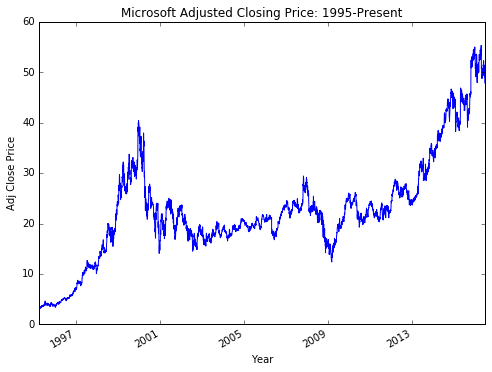

In [5]:
msft_data['Adj Close'].plot(figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Adj Close Price')
plt.title('Microsoft Adjusted Closing Price: 1995-Present')

This plot shows that the close price of MSFT increases in general over the past 20 years. However, there is no apparent pattern in the movement of the stock price. 

## Statistical Anomaly Detection

### Are the Data Normally Distributed?

If we could prove that the closing price (or any transformation of the closing price) is normally distributed, we could use the Z-score to detect outliers with a defined confidence interval. However, as shown below, the data are not normally distributed and cannot be transformed to make it normally distributed.

p-value (H0: Adj close price is normally distributed) 1.37094788325e-153


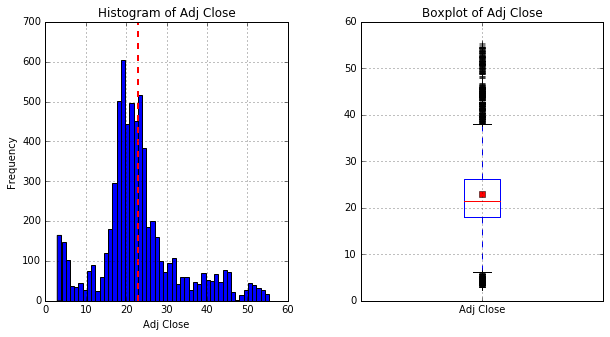

In [6]:
show_hist_box(msft_data, 'Adj Close')
print 'p-value (H0: Adj close price is normally distributed)', normaltest(msft_data['Adj Close']).pvalue

The adjusted closing price data for Microsoft is not normally distributed.

We next tries various ways of looking at the adjusted closing price data for Microsoft.

The _First Difference_ is calculated by subtracting the current day's closing price from the previous day's closing price. It also is not normally distributed.

In [7]:
msft_data['First Difference'] = msft_data['Adj Close'] - msft_data['Adj Close'].shift()
msft_data['First Difference'] = msft_data['First Difference'].fillna(0.0)

p-value (H0: First difference is normally distributed) 0.0


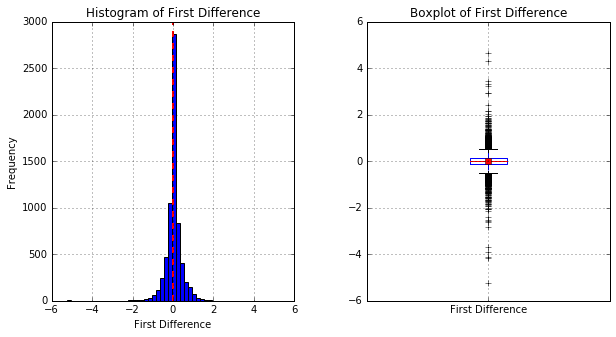

In [8]:
show_hist_box(msft_data, 'First Difference')
print 'p-value (H0: First difference is normally distributed)', normaltest(msft_data['First Difference']).pvalue

The _Second Difference_ is calculated by subtracting the current _First Difference_ from the previous day's _First Difference_. It also is not normally distributed.

In [9]:
msft_data['Second Difference'] = msft_data['First Difference'] - msft_data['First Difference'].shift()
msft_data['Second Difference'] = msft_data['Second Difference'].fillna(0.0)

p-value (H0: Second difference is normally distributed) 2.32278169991e-252


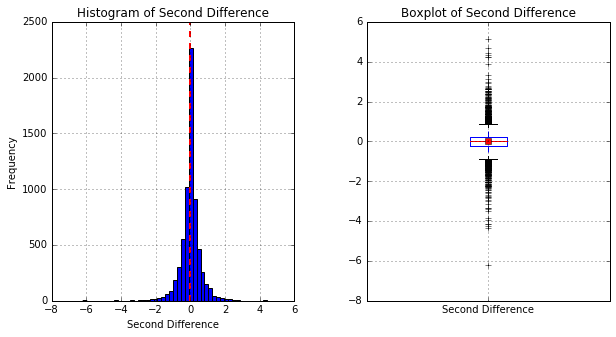

In [10]:
show_hist_box(msft_data, 'Second Difference')
print 'p-value (H0: Second difference is normally distributed)', normaltest(msft_data['Second Difference']).pvalue

The _MA7 Difference_ is calculated by subtracting the current _moving average_ from the _7 Day Moving Average_. It also is not normally distributed.

In [11]:
msft_data['Moving Average 7'] = msft_data['Adj Close'].rolling(window=7).mean().fillna(0.0)
msft_data['MA7 Difference'] = msft_data['Adj Close'] - msft_data['Moving Average 7']
msft_data['MA7 Difference'] = msft_data['MA7 Difference'].fillna(0.0)

p-value (H0: MA7 difference is normally distributed) 4.52383800122e-259


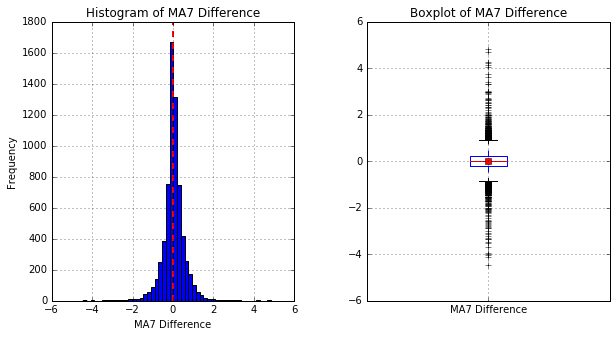

In [12]:
show_hist_box(msft_data, 'MA7 Difference')
print 'p-value (H0: MA7 difference is normally distributed)', normaltest(msft_data['MA7 Difference']).pvalue

The _MA30 Difference_ is calculated by subtracting the current _moving average_ from the _30 Day Moving Average_. It also is not normally distributed.

In [13]:
msft_data['Moving Average 30'] = msft_data['Adj Close'].rolling(window=30).mean().fillna(0.0)
msft_data['MA30 Difference'] = msft_data['Adj Close'] - msft_data['Moving Average 30']
msft_data['MA30 Difference'] = msft_data['MA30 Difference'].fillna(0.0)

p-value (H0: MA30 difference is normally distributed) 4.30778873739e-167


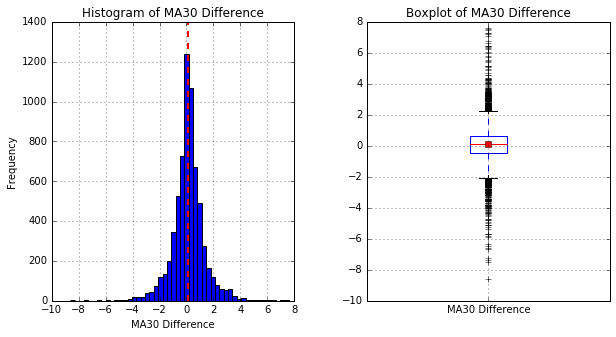

In [14]:
show_hist_box(msft_data, 'MA30 Difference')
print 'p-value (H0: MA30 difference is normally distributed)', normaltest(msft_data['MA30 Difference']).pvalue

The _MA120 Difference_ is calculated by subtracting the current _moving average_ from the _120 Day Moving Average_. It also is not normally distributed.

In [15]:
msft_data['Moving Average 120'] = msft_data['Adj Close'].rolling(window=120).mean().fillna(0.0)
msft_data['MA120 Difference'] = msft_data['Adj Close'] - msft_data['Moving Average 120']
msft_data['MA120 Difference'] = msft_data['MA120 Difference'].fillna(0.0)

p-value (H0: MA120 difference is normally distributed) 2.94360835772e-106


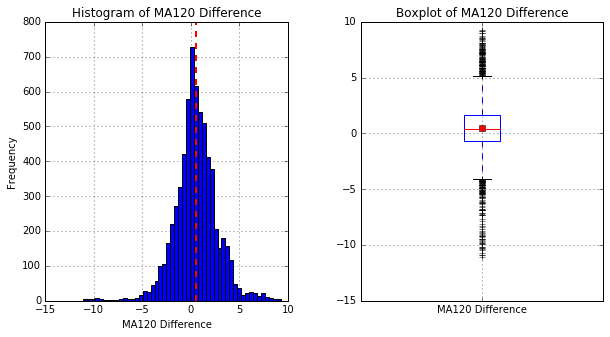

In [16]:
show_hist_box(msft_data, 'MA120 Difference')
print 'p-value (H0: MA120 difference is normally distributed)', normaltest(msft_data['MA120 Difference']).pvalue

**Conclusions:**

The closing price varies significantly over time and exhibits a plateau-shaped histogram making it difficult to define what an outlier is.

The first and second closing price derivatives exhibit mound shaped distributions but they are also not normal. Applying transformations (log, sqrt, etc.) also did not result in normally distributed data. Therefore, we concluded that a better approach would be to analyze multidimensional data.

### Tukey Method of Anomaly Detection

The simplest method of detecting outliers is the Tukey method ($value < Q1 - 1.5*IQR$ or $value > Q3 + 1.5*IQR$), as shown below.

In [17]:
def is_outlier(value, p25, p75):
    lower = p25 - 1.5 * (p75 - p25)
    upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper

def find_outliers(values):
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    return np.array([is_outlier(value, q1, q3) for value in values])

In [18]:
def show_outliers(df, data_column, outliers_mask, figsize=(12, 6), title = None):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    df[data_column].plot(title = title, ax = ax)
    df[outliers_mask][data_column].plot(linestyle = '', marker = 'o', color = 'r', markersize = 5, ax = ax, label='Outlier') 
    ax.set_xlabel('Year')
    ax.set_ylabel(data_column)
    ax.legend(loc='best')
    return ax

When using _First Difference_ and the Tukey method of detecting outliers, we see that far too many outliers are detected.

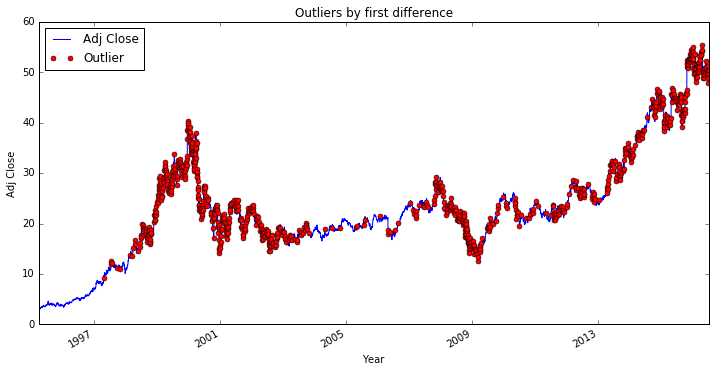

In [19]:
outliers_mask =  find_outliers(msft_data['First Difference'].as_matrix())
show_outliers(msft_data, 'Adj Close', outliers_mask, title = 'Outliers by first difference')

When using _Second Difference_ and the Tukey method of detecting outliers, we still see that far too many outliers are detected.

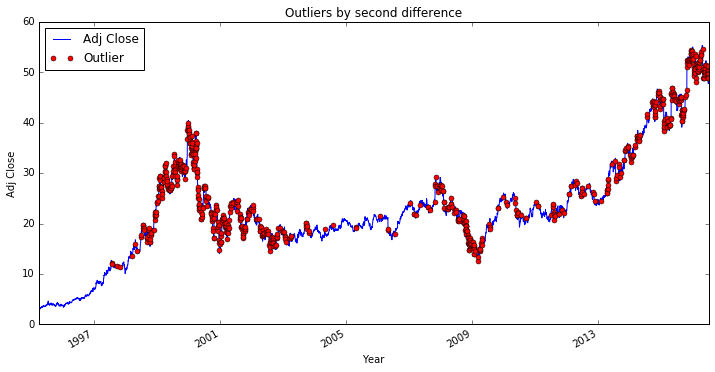

In [20]:
outliers_mask =  find_outliers(msft_data['Second Difference'].as_matrix())
show_outliers(msft_data, 'Adj Close', outliers_mask, title = 'Outliers by second difference')

When using _MA7 Difference_ and the Tukey method of detecting outliers, we still see that far too many outliers are detected.

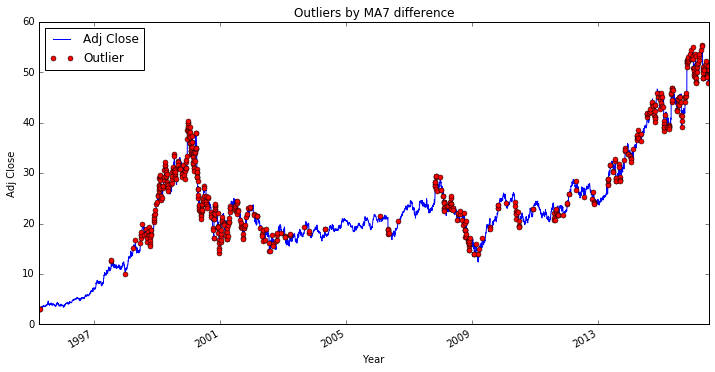

In [21]:
outliers_mask =  find_outliers(msft_data['MA7 Difference'].as_matrix())
show_outliers(msft_data, 'Adj Close', outliers_mask, title = 'Outliers by MA7 difference')

When using _MA30 Difference_ and the Tukey method of detecting outliers, we still see a huge number of outliers being detected.

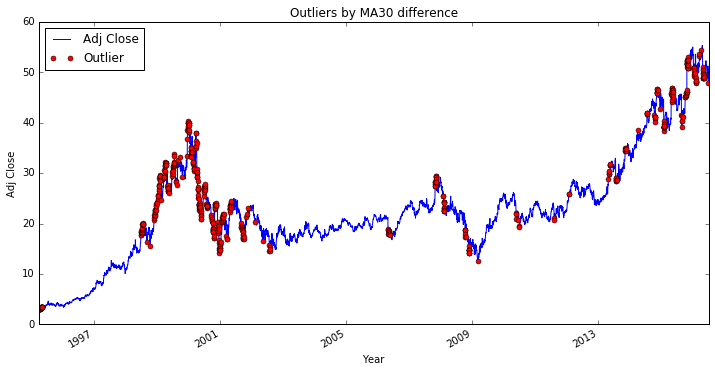

In [22]:
outliers_mask =  find_outliers(msft_data['MA30 Difference'].as_matrix())
show_outliers(msft_data, 'Adj Close', outliers_mask, title = 'Outliers by MA30 difference')

When using _MA120 Difference_ and the Tukey method of detecting outliers, we see the number of outliers being detected going down a bit.

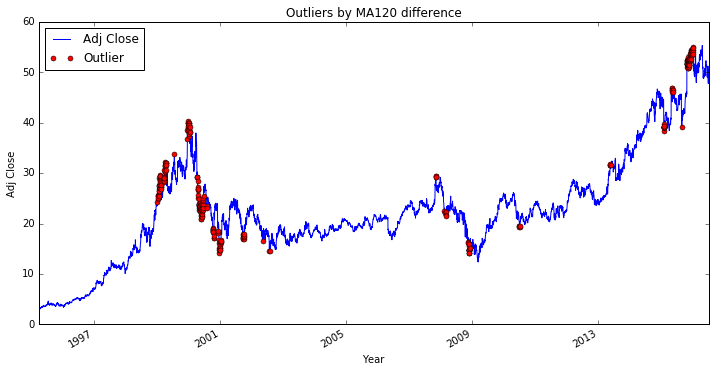

In [23]:
outliers_mask =  find_outliers(msft_data['MA120 Difference'].as_matrix())
show_outliers(msft_data, 'Adj Close', outliers_mask, title = 'Outliers by MA120 difference')

Finally, in the graph below, we only accept as an outlier those points that were labeled as outliers in all of the five above outlier detection criteria.

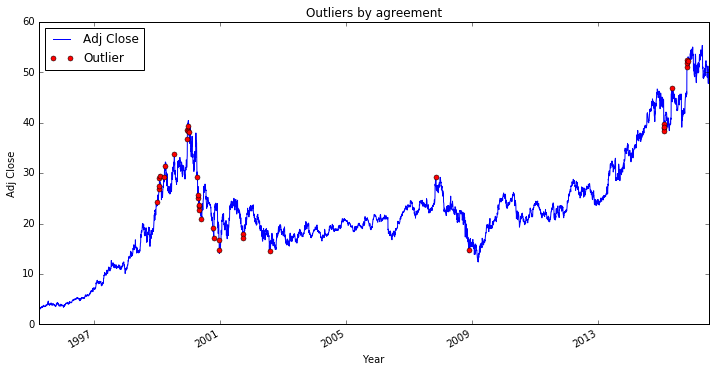

In [24]:
# all agree
outliers_mask =  find_outliers(msft_data['First Difference'].as_matrix())
outliers_mask = outliers_mask & find_outliers(msft_data['Second Difference'].as_matrix())
outliers_mask = outliers_mask & find_outliers(msft_data['MA7 Difference'].as_matrix())
outliers_mask = outliers_mask & find_outliers(msft_data['MA30 Difference'].as_matrix())
outliers_mask = outliers_mask & find_outliers(msft_data['MA120 Difference'].as_matrix())
show_outliers(msft_data, 'Adj Close', outliers_mask, title = 'Outliers by agreement')

The Tukey Method turns out to not be useful for our dataset. The outliers it detects are difficult to interpret because they have no confidence levels associated with them, it labels far to many outliers, and this method cannot handle the multidimensional dataset we have created.

## Offline anomaly detection using mutlidimensional data

The methods below can detect outliers in mutli-dimensional data. These could be used to validate our results from our outlier detection method.

### Isolation Forest

The SciKit Learn documentation for this funciton describes an Isolation Forest as such:

"Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies.

Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies."

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [25]:
X =  StandardScaler().fit_transform(msft_data.as_matrix())

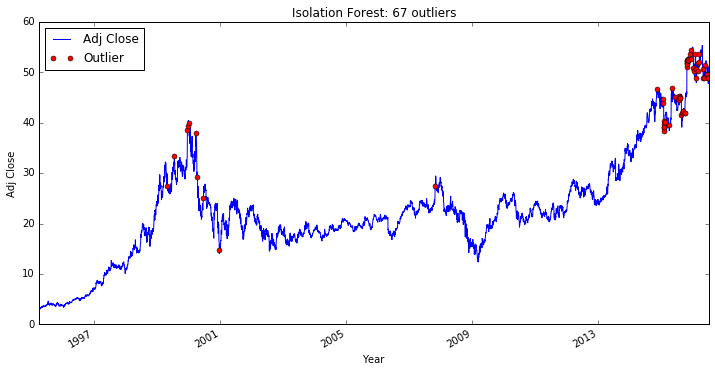

In [26]:
outliers_fraction = 0.01
clf = IsolationForest(contamination = outliers_fraction).fit(X)
p = clf.predict(X)
outliers_mask = p == -1
title = 'Isolation Forest: {} outliers'.format(np.sum(p == -1))
show_outliers(msft_data, 'Adj Close', outliers_mask, title = title)

### One Class SVM

The SciKit Learn documentation for this funciton describes One Class SVM as such:

"Unsupervised Outlier Detection.
Estimate the support of a high-dimensional distribution.
The implementation is based on libsvm."

http://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html

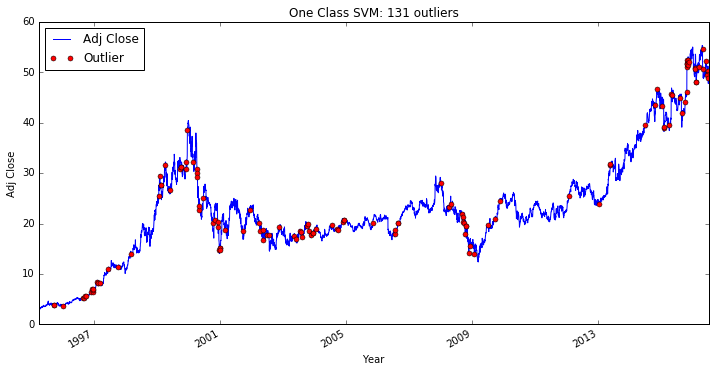

In [27]:
outliers_fraction = 0.01
clf = OneClassSVM(nu = 0.95 * outliers_fraction + 0.01, kernel = "rbf", gamma = 0.01).fit(X)
p = clf.predict(X)
outliers_mask = p == -1
title = 'One Class SVM: {} outliers'.format(np.sum(p == -1))
show_outliers(msft_data, 'Adj Close', outliers_mask, title = title) 


The ability of the OCSVM to detect anomalies is highly dependent on the information captured in the kernel (the data representation).
